<a href="https://colab.research.google.com/github/danihga/Jovia/blob/main/Clusteirng_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the association between the questions answered

In [128]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [129]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

def do_clustering(data: pd.DataFrame, method: str = 'KMeans', **kwargs)->pd.Series:
    
    d_frame = data.copy()

    algorithms = {
        'KMeans': KMeans,
        'AgglomerativeClustering': AgglomerativeClustering,
        'DBSCAN': DBSCAN
        # Add more clustering algorithms as needed
    }

    if method in algorithms:
        # Create the clustering algorithm object with specified parameters
        algorithm = algorithms[method](**kwargs)
        # Fit the algorithm to the data
        algorithm.fit(data)
        # Return the labels or clustering results
        if method == 'DBSCAN':
            return algorithm.labels_
        else:
            return algorithm.labels_.tolist()  # Convert labels to list for compatibility
    else:
        raise ValueError(f"Unsupported clustering algorithm: {method}")



In [130]:
def cluster_analysis(data: pd.DataFrame):
    # Create a 2x2 grid of figures for each label
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Create boxplot for each label
    for label in range(4):  # Assuming labels are 0, 1, 2, 3
        # Filter the data for the current label
        df_label = data[data['Labels'] == label]
        
        # Create boxplot for each column in the current label on the corresponding axis
        sns.boxplot(data=df_label.drop(columns='Labels'), ax=axes[label])
        
        # Set labels and title
        axes[label].set_xlabel('Columns (Q1-Q8)')
        axes[label].set_ylabel('Values')
        axes[label].set_title(f'Boxplot for Cluster {label}')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [131]:
#Import Data

data = pd.read_excel(r'/Users/familiadelasherasgarciahijosdanielnuriapablo/Documents/Applied Math and Data Science/Jovia/DeidentifiedSDOHPatientData-v1.xlsx')

data.sample(6)

# Drop id, age, race, ethnicity, gender
data.drop(columns = ['PatIdentifier','AgeAtAdmit', 'Race', 'Ethnicity', 'Gender'], inplace = True)

questions  = list(data.columns)

data.columns = [f'Q{i+1}' for i in range(len(list(data.columns)))]

questions_dict = dict(zip(data.columns, questions))

data.sample(6)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
8305,Never True,Never True,No,No,No,No,No,NaN
9202,Never True,Never True,No,No,No,No,No,NaN
3146,Patient unable to answer,Patient unable to answer,Patient unable to answer,Patient unable to answer,Patient unable to answer,Patient unable to answer,Patient unable to answer,NaN
11682,Never True,Never True,No,No,No,No,No,NaN
3281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
data.shape

(15843, 8)

In [152]:
data.isnull().sum()/15843

Q1    0.0
Q2    0.0
Q3    0.0
Q4    0.0
Q5    0.0
Q6    0.0
Q7    0.0
Q8    0.0
dtype: float64

In [134]:
for i in data.columns:
    data[i] = data[i].map({'Never True':1, 'Patient unable to answer':0, 'Patient declined':0,
       'Sometimes True':1, 'Often True':2, 'No':1, 'Yes':2, 'Already Shut Off':2 })

In [135]:
data.fillna(0, inplace = True)

## Label Encoding Approach

**Proportions of the answers to the questions and Encode Questions**

In [136]:
data['Q1'].value_counts(normalize=True, dropna=False)#.cumsum()


Q1
1.0    0.649498
0.0    0.347598
2.0    0.002903
Name: proportion, dtype: float64

In [137]:
data['Q2'].value_counts(normalize=True,dropna=False)#.cumsum()

Q2
1.0    0.649056
0.0    0.347977
2.0    0.002967
Name: proportion, dtype: float64

In [138]:
data['Q3'].value_counts(normalize=True,dropna=False)#.cumsum()

Q3
1.0    0.500978
0.0    0.490311
2.0    0.008710
Name: proportion, dtype: float64

In [139]:
data['Q4'].value_counts(normalize=True,dropna=False)#.cumsum()

Q4
1.0    0.501988
0.0    0.490437
2.0    0.007574
Name: proportion, dtype: float64

In [140]:
data['Q5'].value_counts(normalize=True,dropna=False)#.cumsum()

Q5
1.0    0.498769
0.0    0.491700
2.0    0.009531
Name: proportion, dtype: float64

In [141]:
data['Q6'].value_counts(normalize=True,dropna=False)#.cumsum()

Q6
1.0    0.501736
0.0    0.491447
2.0    0.006817
Name: proportion, dtype: float64

In [142]:
data['Q7'].value_counts(normalize=True,dropna=False)#.cumsum()

Q7
1.0    0.502556
0.0    0.491321
2.0    0.006123
Name: proportion, dtype: float64

In [143]:
data['Q8'].value_counts(normalize=True,dropna=False)#.cumsum()

Q8
0.0    0.755349
1.0    0.240169
2.0    0.004481
Name: proportion, dtype: float64

In [144]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
15838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15839,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
15840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15841,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


## Clustering

In [145]:
#pip install yellowbrick

In [146]:
# Elbow method to determine the appropiate number of clusters
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import mplcursors

Elbow Method to determine the number of clusters to be formed:


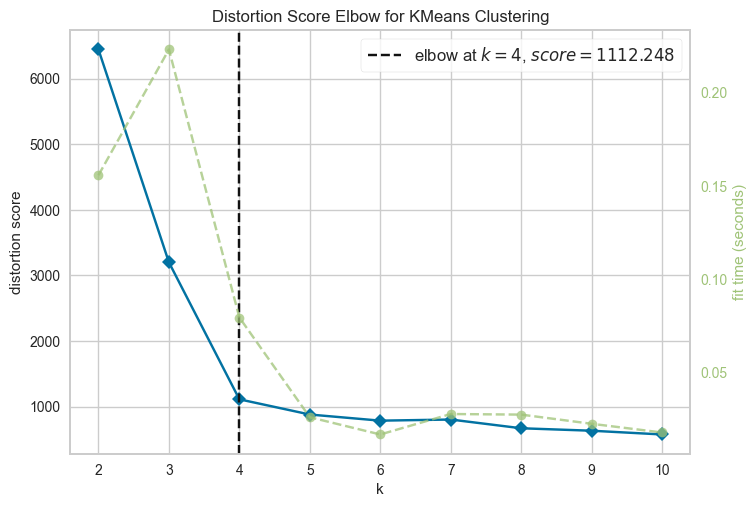

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

In [148]:
#pip install mplcursors

**Analysis of Clusters KMeans**

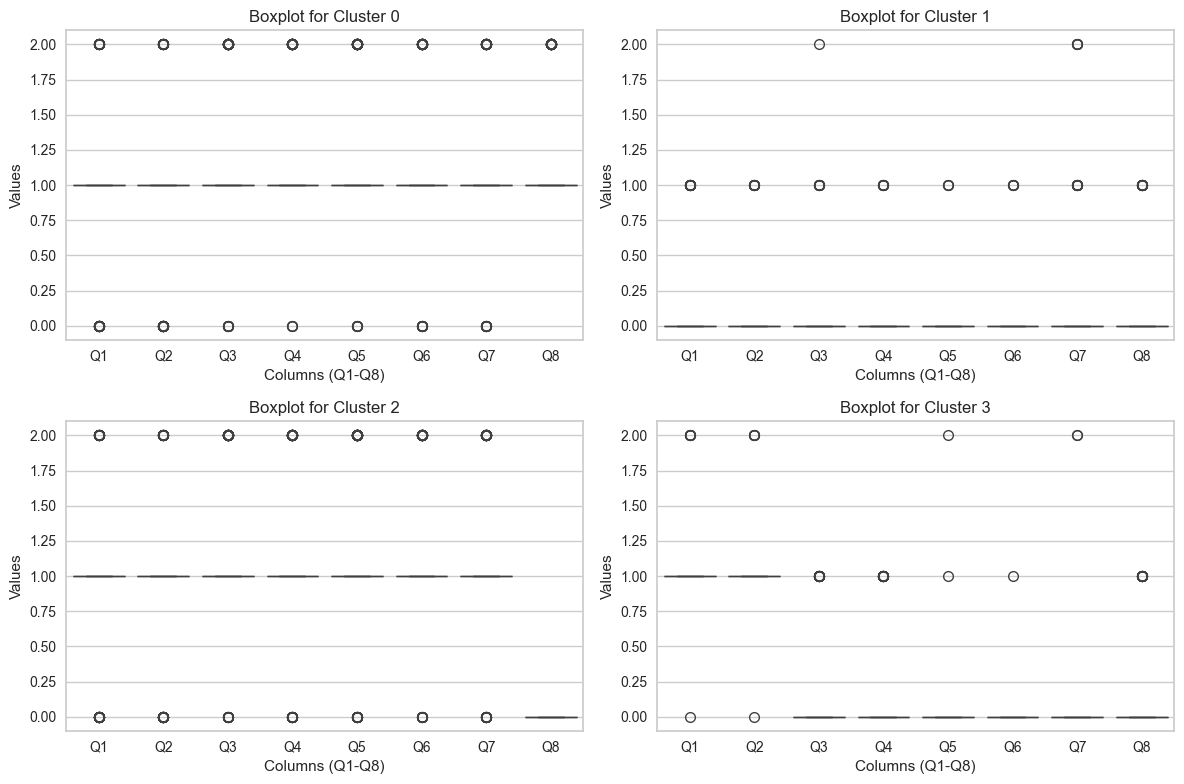

1    0.344758
2    0.266237
0    0.243010
3    0.145995
Name: proportion, dtype: float64

In [149]:
km_data = data.copy()

km_labels = do_clustering(data, method = 'KMeans', n_clusters = 4)

km_data['Labels'] = km_labels

cluster_analysis(km_data)

pd.Series(km_labels).value_counts(normalize = True)

**Agglomerative Clustering**

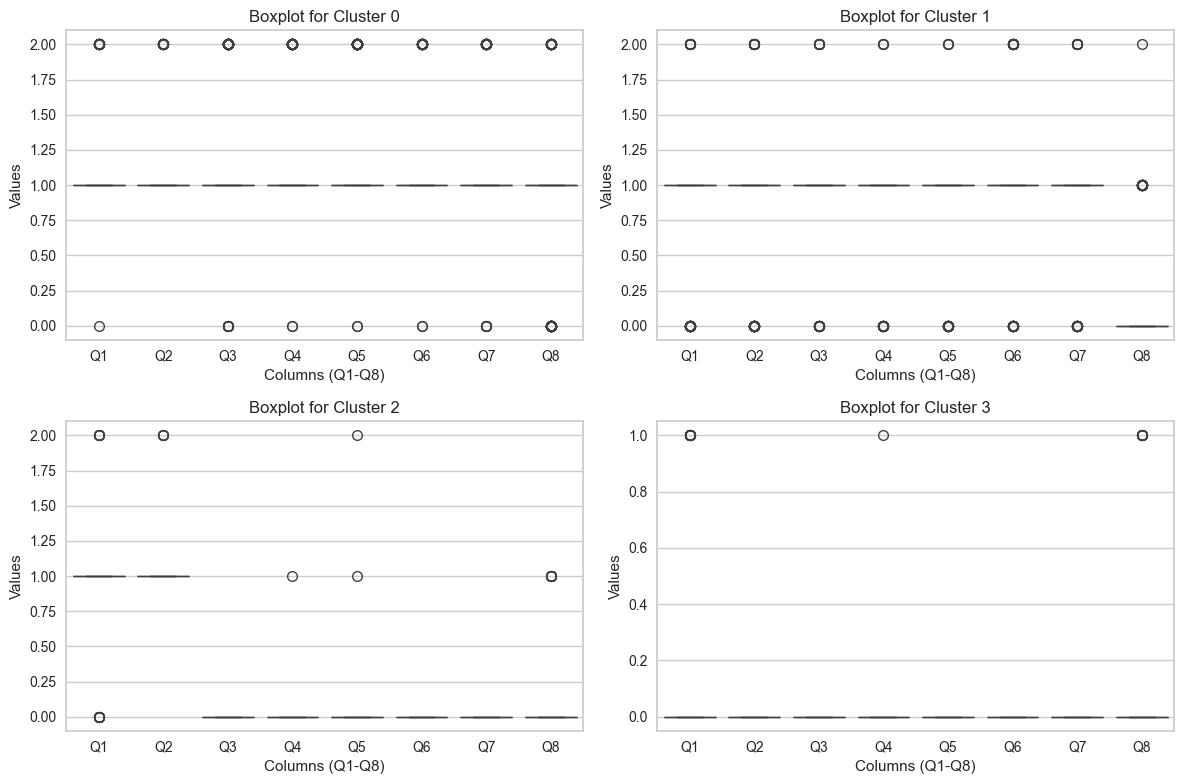

3    0.343180
1    0.263902
0    0.247680
2    0.145238
Name: proportion, dtype: float64

In [150]:
ac_clustering = data.copy()

ac_labels = do_clustering(data, method = 'AgglomerativeClustering', n_clusters = 4)

ac_clustering['Labels'] = ac_labels

cluster_analysis(ac_clustering)

pd.Series(ac_labels).value_counts(normalize = True)

**DBSCAN**

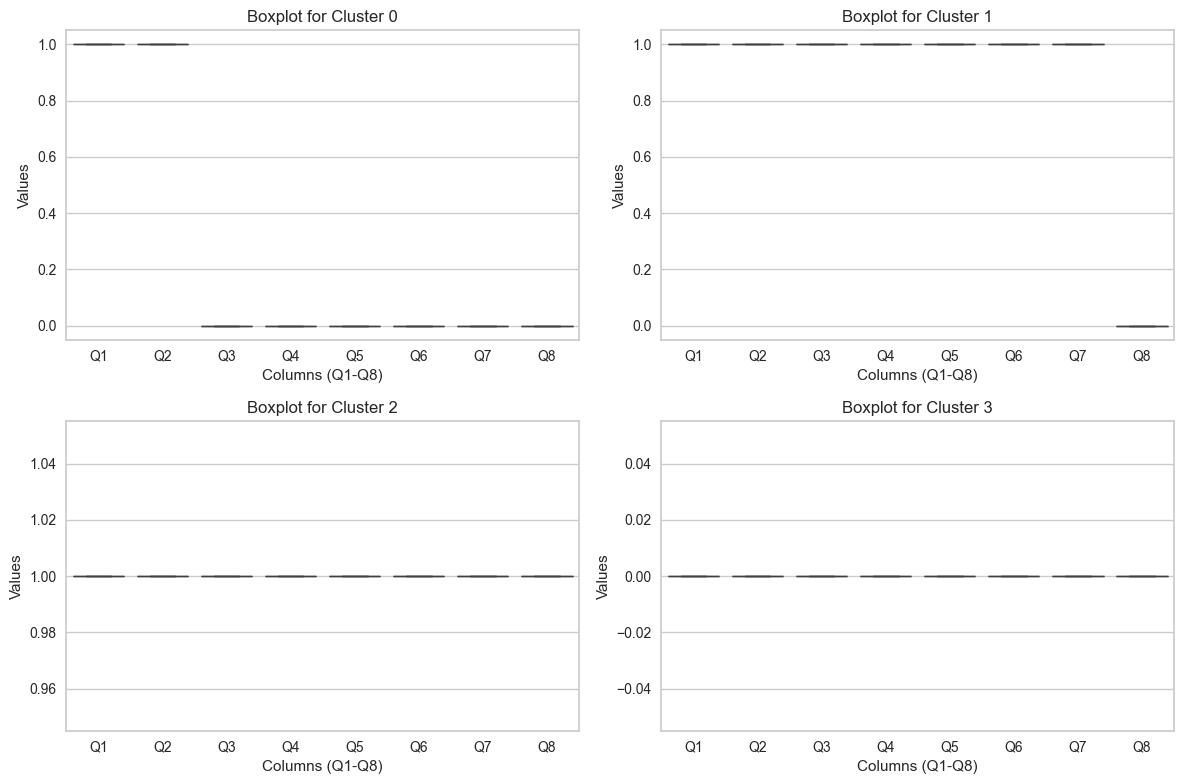

 3     0.341854
 1     0.253109
 2     0.228681
 0     0.143849
-1     0.010983
 4     0.002903
 7     0.001452
 13    0.001389
 11    0.001199
 10    0.001010
 25    0.000947
 9     0.000821
 27    0.000757
 18    0.000694
 8     0.000631
 12    0.000631
 22    0.000568
 17    0.000568
 16    0.000568
 15    0.000568
 34    0.000505
 21    0.000505
 29    0.000505
 28    0.000505
 6     0.000505
 30    0.000442
 5     0.000442
 26    0.000442
 20    0.000379
 31    0.000379
 24    0.000316
 23    0.000316
 14    0.000316
 32    0.000316
 33    0.000316
 19    0.000316
 35    0.000316
Name: proportion, dtype: float64

In [151]:
dbscan_data = data.copy()

dbscan_labels = do_clustering(data, method = 'DBSCAN')
dbscan_data['Labels'] = dbscan_labels

cluster_analysis(dbscan_data)

pd.Series(dbscan_labels).value_counts(normalize = True)